In [1]:
import mne
import numpy as np
import pandas as pd

In [2]:
file_path = "C:\Перенос\Доки\Мага брат\Методология научных исследований\ВКР\OpenBCISession_Senya 1\OpenBCI-RAW-2024-04-01_16-48-29.txt"

In [3]:
with open(file_path, mode='r') as f:
    file_info = []
    while (info:=f.readline()[:-1])[0] == '%':
        file_info.append(info)

In [4]:
file_info

['%OpenBCI Raw EXG Data',
 '%Number of channels = 8',
 '%Sample Rate = 250 Hz',
 '%Board = OpenBCI_GUI$BoardCytonSerial']

In [5]:
sr = 250

In [51]:
df = pd.read_csv(file_path, skiprows=len(file_info), skipinitialspace=True)

In [52]:
step = 1/250
df['Time'] = np.arange(0, len(df)/250, step)
df

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted),Time
0,123.0,38522.181037,27018.989863,-40200.752342,14425.927630,18219.152775,-10335.603098,9385.139869,-44330.751220,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711979e+09,0.0,2024-04-01 16:48:29.535,0.000
1,124.0,38549.494868,27046.147233,-40169.638714,14456.504817,18241.415112,-10308.691598,9414.532413,-44306.477226,0.010,...,64.0,2.0,160.0,0.0,0.0,0.0,1.711979e+09,0.0,2024-04-01 16:48:29.535,0.004
2,125.0,38542.051738,27036.513631,-40169.124623,14472.441610,18232.385007,-10311.284400,9423.987201,-44310.902871,0.010,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711979e+09,0.0,2024-04-01 16:48:29.535,0.008
3,126.0,38511.765124,27005.645872,-40196.661973,14456.236596,18194.163524,-10332.317392,9398.595619,-44338.283758,0.010,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711979e+09,0.0,2024-04-01 16:48:29.535,0.012
4,127.0,38511.966290,27004.975320,-40198.472464,14443.496101,18193.336510,-10347.069543,9384.804593,-44342.217665,0.010,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711979e+09,0.0,2024-04-01 16:48:29.535,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72617,84.0,31079.921851,20666.266461,-35507.623614,23422.862401,16134.919659,-11129.492358,7186.577581,-30175.056180,0.044,...,48.0,255.0,96.0,0.0,0.0,0.0,1.711980e+09,0.0,2024-04-01 16:53:19.766,290.468
72618,85.0,31065.214403,20663.986583,-35522.085192,23391.793477,16119.675770,-11148.848969,7154.145200,-30187.148474,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711980e+09,0.0,2024-04-01 16:53:19.766,290.472
72619,86.0,31077.776084,20690.808677,-35508.338870,23388.217197,16135.232584,-11137.807207,7154.368717,-30166.406055,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711980e+09,0.0,2024-04-01 16:53:19.766,290.476
72620,87.0,31089.197825,20695.279025,-35496.559500,23409.093727,16149.001258,-11122.160986,7180.967293,-30152.346808,0.044,...,0.0,0.0,0.0,0.0,0.0,0.0,1.711980e+09,0.0,2024-04-01 16:53:19.766,290.480


In [53]:
cols_to_drop = [col for col in df.columns if not col.startswith('EXG') and col!='Time']
df = df.drop(columns=cols_to_drop, axis=1)

In [54]:
df.iloc[:, :-1] /= 1000 
df

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Time
0,38.522181,27.018990,-40.200752,14.425928,18.219153,-10.335603,9.385140,-44.330751,0.000
1,38.549495,27.046147,-40.169639,14.456505,18.241415,-10.308692,9.414532,-44.306477,0.004
2,38.542052,27.036514,-40.169125,14.472442,18.232385,-10.311284,9.423987,-44.310903,0.008
3,38.511765,27.005646,-40.196662,14.456237,18.194164,-10.332317,9.398596,-44.338284,0.012
4,38.511966,27.004975,-40.198472,14.443496,18.193337,-10.347070,9.384805,-44.342218,0.016
...,...,...,...,...,...,...,...,...,...
72617,31.079922,20.666266,-35.507624,23.422862,16.134920,-11.129492,7.186578,-30.175056,290.468
72618,31.065214,20.663987,-35.522085,23.391793,16.119676,-11.148849,7.154145,-30.187148,290.472
72619,31.077776,20.690809,-35.508339,23.388217,16.135233,-11.137807,7.154369,-30.166406,290.476
72620,31.089198,20.695279,-35.496560,23.409094,16.149001,-11.122161,7.180967,-30.152347,290.480


In [169]:
def bci_df(file_path, skip_rows=4, sfreq=250):
    df = pd.read_csv(file_path, skiprows=skip_rows, skipinitialspace=True)
    step = 1/sfreq
    df['Time'] = np.arange(0, len(df)/250, step)
    cols_to_drop = [col for col in df.columns if not col.startswith('EXG') and col!='Time']
    df = df.drop(columns=cols_to_drop, axis=1)
    # df.iloc[:, :-1] /= 1_000_000 
    return df

def bci_df_to_mne(df, start, end, sfreq=250):
    condition = (df['Time'] >= start) & (df['Time'] <= end) 
    data = df[condition].drop(columns='Time', axis=1).T.to_numpy()
    # data /= 1_000_000
    
    ch_names = df.columns[:-1].tolist()
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=['eeg']*len(ch_names), verbose=False)
    eeg = mne.io.RawArray(data=data, info=info, verbose=False)
    return eeg

def filter_eeg(data):
    low_cutoff = 1
    high_cutoff = 45
    data_filt = data.copy()
    data_filt.filter(l_freq=1, h_freq=45, method='iir', verbose=False)
    
    ...
    
    return data_filt

In [152]:
df = bci_df(file_path)

In [170]:
eeg = bci_df_to_mne(df, 40, 60)
eeg_filt = filter_eeg(eeg)

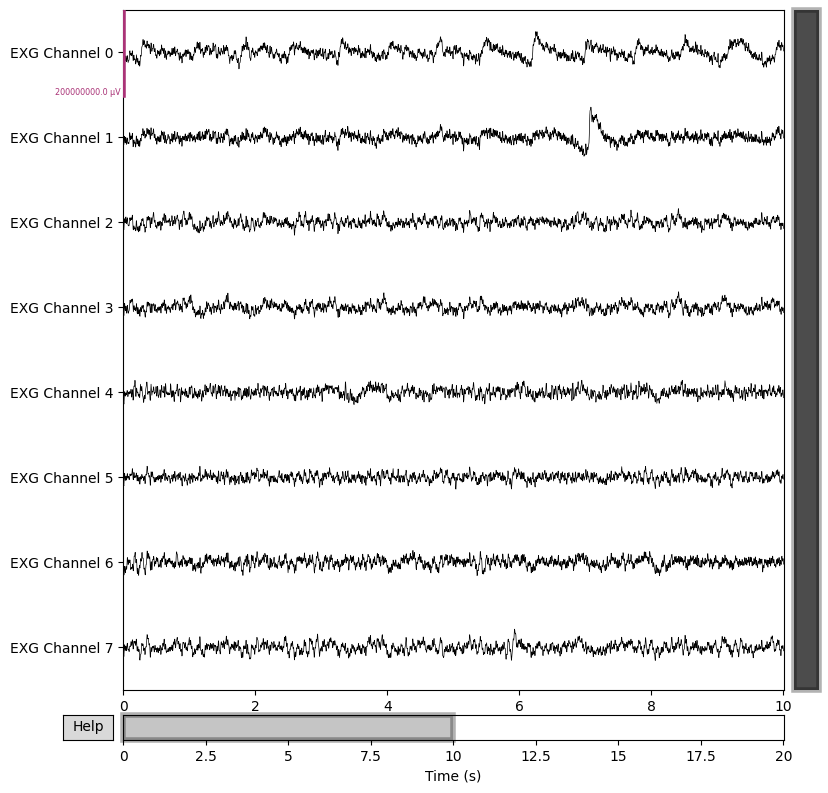

In [172]:
eeg_filt.plot(scalings=100);